<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [569]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [570]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [571]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('titanic.csv')
des = df.describe()

In [572]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
Nan,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,19.865320,0.000000,0.000000,0.000000


In [573]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df_target = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].copy()
df_target.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [574]:
# Alumno, elimine aquellas filas que tengan columnas vacias
df_target.dropna(inplace=True)
df_target.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [575]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df_target.shape

(714, 6)

In [576]:
# Cantidad de datos para analizar
df_target.size

4284

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [577]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_target.describe()

,Survived,Pclass,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373
std,0.491460,0.838250,14.526497,0.929783,0.853289
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000


In [578]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o no
# Calcular el número y el porcentaje de sobrevivientes y no sobrevivientes
# Contar la cantidad de sobrevivientes (1) y no sobrevivientes (0)
sobrevivientes = df_target['Survived'].value_counts()

#(AQUI QUIERO CALCULAR EL PORCENTAJE DE CADA UNO)
cantidad_total_sobrevivientes = sobrevivientes.sum()
porcentaje_sobrevivientes = sobrevivientes / cantidad_total_sobrevivientes * 100

print(f'Sobrevivientes: {sobrevivientes[1]} ({porcentaje_sobrevivientes[1]:.2f}%)')
print(f'Sobrevivientes: {sobrevivientes[0]} ({porcentaje_sobrevivientes[0]:.2f}%)')

Sobrevivientes: 290 (40.62%)
Sobrevivientes: 424 (59.38%)


Sobrevivientes masculinos: 93
Sobrevivientes femeninos: 197


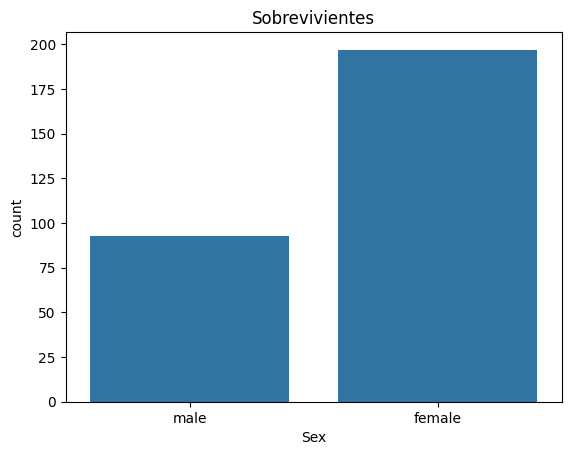

In [579]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sobrevivientes_masculinos = df_target[(df_target['Sex'] == 'male') & (df_target['Survived'] == 1)]
sobrevivientes_femeninos = df_target[(df_target['Sex'] == 'female') & (df_target['Survived'] == 1)]

print(f'Sobrevivientes masculinos: {sobrevivientes_masculinos.shape[0]}')
print(f'Sobrevivientes femeninos: {sobrevivientes_femeninos.shape[0]}')

datos_sobrevivientes = pd.concat([sobrevivientes_masculinos, sobrevivientes_femeninos])

sns.countplot(x='Sex', data=datos_sobrevivientes)
plt.title('Sobrevivientes')
plt.show()

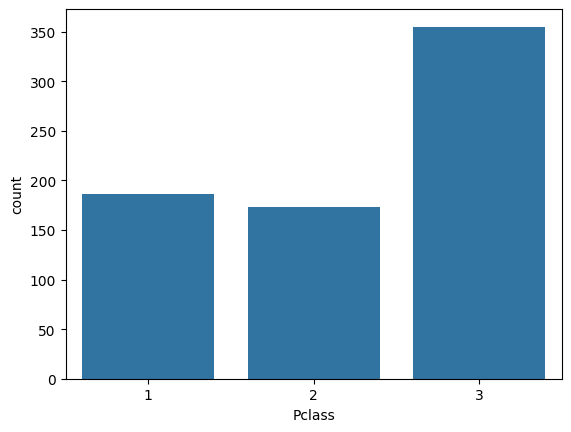

In [580]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(x='Pclass', data=df_target)
plt.show()

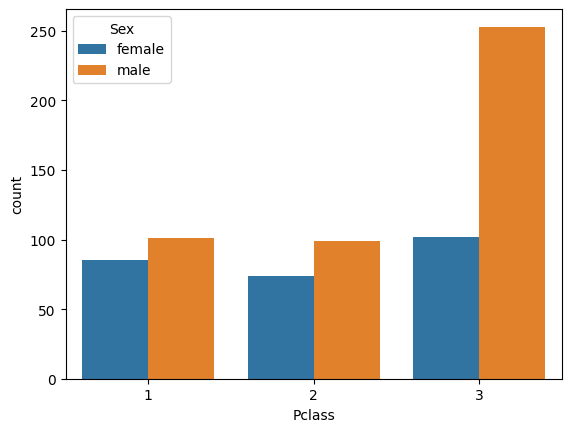

In [581]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(x='Pclass', hue='Sex', data=df_target)
plt.show()

#### Transformar variables categóricas texto a clases numeradas

In [582]:
from sklearn.preprocessing import LabelEncoder

In [583]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df_target.copy()

In [584]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cod['Sex'] = encoder.fit_transform(df_cod['Sex'])

In [585]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
print(encoder.classes_)

['female' 'male']


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [586]:
# Alumno, genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod.drop('Survived', axis=1).values
y = df_cod['Survived'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [587]:
# Alumno, generar los dataset de train y test superando en 70%30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [588]:
# Alumno, entrene un clasificador cualquier sea con los datos de train
# Genere las predicciones y_hat con el dataset de test
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clasificador = LogisticRegression()
clasificador.fit(X_train, y_train)
y_hat_base = clasificador.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [589]:
# Alumno, calcular la exactitud (accuracy) de su clasificador
# Debe superar el modelo base (50%)
accuracy_score(y_test, y_hat_base)

0.7767441860465116

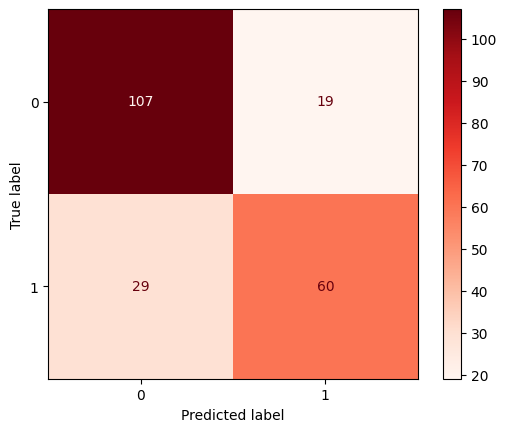

In [590]:
# Alumno, dibujar la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat_base)
cmd = ConfusionMatrixDisplay(cm, display_labels=clasificador.classes_)
cmd.plot(cmap=plt.cm.Reds)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [591]:
# Alumno, ponga a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores

ficticio = {'Pclass':[3], 'Sex':[1], 'Age':[22], 'SibSp':[1], 'Parch':[0]}

df_ficticio = pd.DataFrame(ficticio)
y_hat_ficticio = clasificador.predict(df_ficticio.values)
y_hat_ficticio[0]

# No entiendo por qué el modelo me regresa 0, ¿quiere decir que falla? ¿O qué es?

0